In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("~/data/corda/corda.csv")
df = df[df.modality.isin(['CR', 'DX'])]
df.head()

,patient_id,study_number,series_number,modality,sex,age,rx,covid,path,institution
0,2_4430924,NaN,1,CR,M,57.0,0.0,0,mauriziano/CORDA_M_20,mauriziano
1,2_1405431,NaN,1,CR,F,48.0,0.0,0,mauriziano/CORDA_M_2,mauriziano
2,2_1785971,NaN,1,CR,M,50.0,0.0,0,mauriziano/CORDA_M_92,mauriziano
3,2_1440961,NaN,1,CR,F,61.0,0.0,0,mauriziano/CORDA_M_10,mauriziano
4,2_6381293,NaN,1,CR,M,34.0,0.0,0,mauriziano/CORDA_M_39,mauriziano


In [3]:
df.groupby('covid').count()

,patient_id,study_number,series_number,modality,sex,age,rx,path,institution
covid,,,,,,,,,
0,695,0,695,695,210,218,695,695,695
1,906,156,906,906,645,658,654,906,906


In [4]:
weights = np.array([len(df) / 695, len(df) / 906])
weights / weights.sum()

array([0.56589631, 0.43410369])

In [5]:
df.groupby(['covid', 'institution']).count()

patient_id  study_number  series_number  modality  sex  \
covid institution                                                           
0     mauriziano           35             0             35        35   35   
      molinette           183             0            183       183  175   
      sanluigi            477             0            477       477    0   
1     mauriziano          138             0            138       138  138   
      molinette           362             0            362       362  349   
      monzino             156           156            156       156  156   
      sanluigi            250             0            250       250    2   

                   age   rx  path  
covid institution                  
0     mauriziano    35   35    35  
      molinette    183  183   183  
      sanluigi       0  477   477  
1     mauriziano   138  138   138  
      molinette    362  362   362  
      monzino      156  154   156  
      sanluigi       2    0   250

In [6]:
df = df[df.age != 1823]

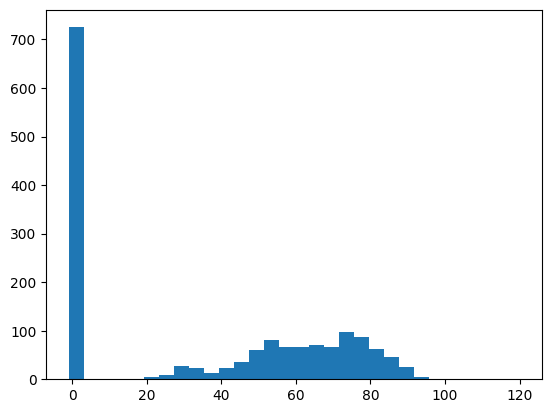

In [7]:
df = df.fillna(-1)

fig = plt.figure()
plt.hist(df.age.astype(int).values, density=False, bins=30)
plt.show()

In [8]:
grouped = df.groupby('institution')
grouped.count()

,patient_id,study_number,series_number,modality,sex,age,rx,covid,path
institution,,,,,,,,,
mauriziano,173,173,173,173,173,173,173,173,173
molinette,544,544,544,544,544,544,544,544,544
monzino,156,156,156,156,156,156,156,156,156
sanluigi,727,727,727,727,727,727,727,727,727


In [9]:
grouped = df.groupby(['patient_id', 'institution'])
grouped.count()

,,study_number,series_number,modality,sex,age,rx,covid,path
patient_id,institution,,,,,,,,
10,monzino,2,2,2,2,2,2,2,2
100,monzino,1,1,1,1,1,1,1,1
1000479,sanluigi,1,1,1,1,1,1,1,1
1000987,sanluigi,1,1,1,1,1,1,1,1
100146,sanluigi,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
992880,sanluigi,2,2,2,2,2,2,2,2
993792,sanluigi,1,1,1,1,1,1,1,1
996597,sanluigi,1,1,1,1,1,1,1,1


In [10]:
df.groupby(['institution', 'patient_id']).count()

study_number  series_number  modality  sex  age  rx  \
institution patient_id                                                        
mauriziano  2_100763               1              1         1    1    1   1   
            2_102249               1              1         1    1    1   1   
            2_1046280              1              1         1    1    1   1   
            2_1208528              1              1         1    1    1   1   
            2_1247785              1              1         1    1    1   1   
...                              ...            ...       ...  ...  ...  ..   
sanluigi    992880                 2              2         2    2    2   2   
            993792                 1              1         1    1    1   1   
            996597                 1              1         1    1    1   1   
            997595                 1              1         1    1    1   1   
            998977                 2              2         2    2    2   2   

                        covid  path  
institution patient_id               
mauriziano  2_100763        1     1  
            2_102249        1     1  
            2_1046280       1     1  
            2_1208528       1     1  
            2_1247785       1     1  
...                       ...   ...  
sanluigi    992880          2     2  
            993792          1     1  
            996597          1     1  
            997595          1     1  
            998977          2     2  

[1241 rows x 8 columns]

In [11]:
df.groupby(['institution', 'modality']).count()

patient_id  study_number  series_number  sex  age   rx  \
institution modality                                                           
mauriziano  CR               163           163            163  163  163  163   
            DX                10            10             10   10   10   10   
molinette   CR               400           400            400  400  400  400   
            DX               144           144            144  144  144  144   
monzino     CR                63            63             63   63   63   63   
            DX                93            93             93   93   93   93   
sanluigi    CR               713           713            713  713  713  713   
            DX                14            14             14   14   14   14   

                      covid  path  
institution modality               
mauriziano  CR          163   163  
            DX           10    10  
molinette   CR          400   400  
            DX          144   144  
monzino     CR           63    63  
            DX           93    93  
sanluigi    CR          713   713  
            DX           14    14

In [12]:
df.groupby(['institution', 'modality', 'covid']).count()

patient_id  study_number  series_number  sex  age  \
institution modality covid                                                      
mauriziano  CR       0              35            35             35   35   35   
                     1             128           128            128  128  128   
            DX       1              10            10             10   10   10   
molinette   CR       0             168           168            168  168  168   
                     1             232           232            232  232  232   
            DX       0              15            15             15   15   15   
                     1             129           129            129  129  129   
monzino     CR       1              63            63             63   63   63   
            DX       1              93            93             93   93   93   
sanluigi    CR       0             477           477            477  477  477   
                     1             236           236            236  236  236   
            DX       1              14            14             14   14   14   

                             rx  path  
institution modality covid             
mauriziano  CR       0       35    35  
                     1      128   128  
            DX       1       10    10  
molinette   CR       0      168   168  
                     1      232   232  
            DX       0       15    15  
                     1      129   129  
monzino     CR       1       63    63  
            DX       1       93    93  
sanluigi    CR       0      477   477  
                     1      236   236  
            DX       1       14    14

In [14]:
fold0_train = pd.read_csv("~/data/corda/fold0_train.csv")
fold0_test = pd.read_csv("~/data/corda/fold0_test.csv")

In [15]:
fold0_train.groupby(['institution_name', 'modality', 'covid']).count()

patient_id  study_number  series_number  sex  \
institution_name modality covid                                                 
mauriziano       CR       0              26             0             26   26   
                          1              99             0             99   99   
                 DX       1               7             0              7    7   
molinette        CR       0             122             0            122  117   
                          1             177             0            177  168   
                 DX       0              11             0             11   10   
                          1             103             0            103  100   
monzino          CR       1              50            50             50   50   
                 DX       1              66            66             66   66   
sanluigi         CR       0             363             0            363    0   
                          1             172             0            172    1   
                 DX       1              13             0             13    0   

                                 age   rx  path  institution  
institution_name modality covid                               
mauriziano       CR       0       26   26    26           26  
                          1       99   99    99           99  
                 DX       1        7    7     7            7  
molinette        CR       0      122  122   122          122  
                          1      177  177   177          177  
                 DX       0       11   11    11           11  
                          1      103  103   103          103  
monzino          CR       1       50   50    50           50  
                 DX       1       66   64    66           66  
sanluigi         CR       0        0  363   363          363  
                          1        1    0   172          172  
                 DX       1        0    0    13           13

In [16]:
fold0_test.groupby(['institution_name', 'modality', 'covid']).count()

patient_id  study_number  series_number  sex  \
institution_name modality covid                                                 
mauriziano       CR       0               9             0              9    9   
                          1              29             0             29   29   
                 DX       1               3             0              3    3   
molinette        CR       0              46             0             46   45   
                          1              56             0             56   55   
                 DX       0               4             0              4    3   
                          1              26             0             26   26   
monzino          CR       1              13            13             13   13   
                 DX       1              27            27             27   27   
sanluigi         CR       0             114             0            114    0   
                          1              64             0             64    1   
                 DX       1               1             0              1    0   

                                 age   rx  path  institution  
institution_name modality covid                               
mauriziano       CR       0        9    9     9            9  
                          1       29   29    29           29  
                 DX       1        3    3     3            3  
molinette        CR       0       46   46    46           46  
                          1       56   56    56           56  
                 DX       0        4    4     4            4  
                          1       26   26    26           26  
monzino          CR       1       13   13    13           13  
                 DX       1       27   27    27           27  
sanluigi         CR       0        0  114   114          114  
                          1        1    0    64           64  
                 DX       1        0    0     1            1